In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
data = pd.read_csv('Add_sales_data_2018.csv')

In [98]:
data.head(3)

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.0,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.0,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.5,227.80,216.15,217.25,218.20,4213.819


In [99]:
data.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [100]:
data.shape

(205, 7)

In [101]:
#checking null
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

No null values in the dataset

# 1.check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [102]:
corm = data.corr()
corm

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


<AxesSubplot:>

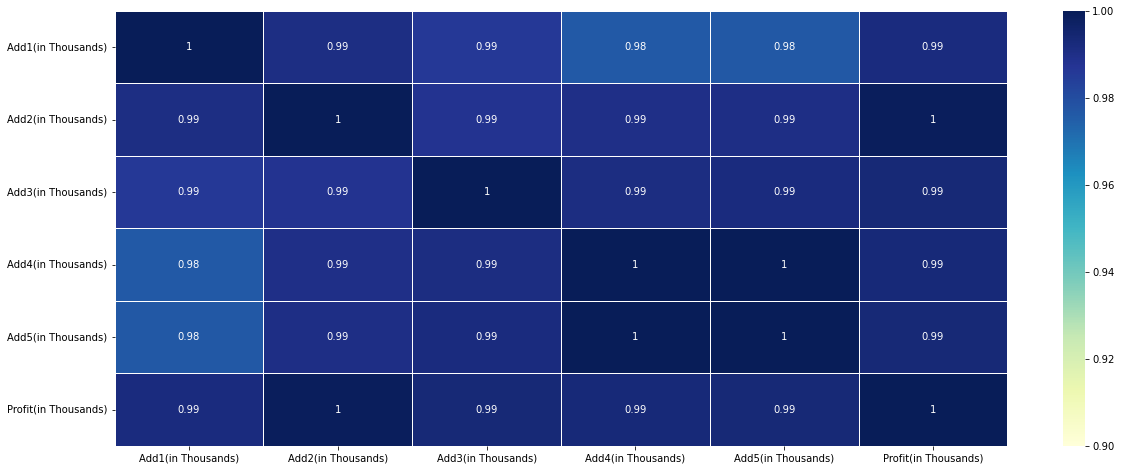

In [103]:
plt.subplots(figsize=(20,8))
sns.heatmap(corm,vmin=.9,vmax=1,annot=True,linewidth=.5,cmap='YlGnBu')

The amount spent for advertising through five different companies and profit generated have high positive correlation,from which 'Add2' has the highest correlation

# 2. Build a regression model to predict the profit from the given data and comment your findings on it


In [104]:
#splitting the data
Y = data['Profit(in Thousands)']

In [105]:
X = data.drop(['Profit(in Thousands)','Date'],axis=1)

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)
predictions

In [107]:
#Calculating the efficiency of our model with MSE

from sklearn.metrics import mean_squared_error
print('MSE is',mean_squared_error(Y_test,predictions))

MSE is 4.64028148505357e-25


The Mean Squared error value is low for this regression model which implies that the predicted and observed data are close to each other showing a better accuracy.

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement

Add1(in Thousands) 290

Add2(in Thousands) 312

Add3(in Thousands) 309

Add4(in Thousands) 298

Add5(in Thousands) 320

In [108]:
values=[[290,312,309,298,320]]

In [109]:
print(model.predict(values))

[5820.06]


C:\Users\nivin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Based on the model prediction,profit is 5820(in thousands) for the above given amount spent for the advertisment